### Group Assignment
### Team Number: 3
### Team Member Names: Derek Tan, Jeff Peng, Yuqian Lin
### Team Strategy Chosen: SAFE

### Abstract

Our portfolio optimization strategy involves the use and implementation of the Modern Portfolio Theory (MPT) and analysis of the Efficient Frontier graphs. The objective of the portfolio optimization strategy is to maximize the portfolio return while maintaining the minimum portfolio risk. 

Modern Portfolio Theory states that since it is assumed that all investors are risk-adverse, when considering the possible portfolio allocation strategies, the investor will prefer the portfolio that maximizes the possible return while maintaining a given amount of risk. 

The Efficient Frontier (EF), the core of our strategy, was introduced by Nobel Laureate Harry Markowitz and is fundamental to MPT. The EP is a graph that illustrates all possible portfolios portfolio allocation distributions. The x-axis represents the volatility/risk of the portfolio, while the y-axis represents the expected return of the portfolio.

The Efficient Frontier shows the optimized portfolios that offer the highest expected return for a given level of risk and the lowest level of risk for a given level of expected return.

An example of the an Efficient Frontier graph is shown below:

![EF Graph](ef.png)

As seen from the graph, the light blue dot is the portfolio that takes on the highest level of risk coupled with the highest degree of return. Conversely, the left-most purple dot depicts the portfolio that with the lowest level of risk and lowest given level of return. Typically, risk-seeking investors will select portfolios that lie on the right end as they yield a higher return for a high level of risk. In our group's case, we chose the "safe" strategy, and thus will be selecting the portfolio on the left-end of the graph as it yields a lower return for a lower level of risk.

We will be discussing more about how we graphed each portfolio along the EF graph below.

In [1]:
from IPython.display import display, Math, Latex
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#Imports CSV file's tickers a list
ticker_df = pd.read_csv("Tickers.csv", index_col=False)
results = list(ticker_df.iloc[:, 0])
results.insert(0, ticker_df.columns[0])

In [3]:
# filters_nan(ticker_list) filters out stocks with invalid prices, that is stocks with NaN values.
# It then produces a list of these filtered tickers

"""
Params:
    ticker_list (listof Str): Unfiltered original list of tickers
"""


def filters_nan(ticker_list):
    start_date = "2018-01-02"
    end_date = "2021-10-31"
    no_nan = []

    for i in range(ticker_list.shape[1]):
        if ticker_list.iloc[:, i].isna().sum() < len(ticker_list) - 209:
            no_nan.append((ticker_list.columns)[i])

    return no_nan

In [4]:
# Import Financial Data

unfiltered_tickers = results

start_date = "2018-01-02"
end_date = "2021-10-31"

data = yf.download(unfiltered_tickers, start=start_date, end=end_date)

data

[*********************100%***********************]  62 of 62 completed

4 Failed downloads:
- CELG: No data found, symbol may be delisted
- PCLN: No data found for this date range, symbol may be delisted
- AGN: No data found, symbol may be delisted
- RTN: No data found, symbol may be delisted


Adj Close                                                     \
                  AAPL        ABBV         ABT         ACN AGN        AIG   
Date                                                                        
2018-01-02   41.188156   81.059547   55.057590  145.079636 NaN  53.185539   
2018-01-03   41.180996   82.328033   55.179337  145.749237 NaN  53.775497   
2018-01-04   41.372276   81.858528   55.085686  147.474976 NaN  53.990028   
2018-01-05   41.843319   83.283516   55.244896  148.691544 NaN  54.213493   
2018-01-08   41.687901   81.949142   55.085686  149.879761 NaN  53.855946   
...                ...         ...         ...         ...  ..        ...   
2021-10-25  148.423386  108.500000  126.580002  356.440002 NaN  59.639999   
2021-10-26  149.102402  109.489998  128.130005  356.339996 NaN  59.230000   
2021-10-27  148.633087  108.400002  127.709999  354.049988 NaN  58.549999   
2021-10-28  152.347656  109.669998  127.709999  356.320007 NaN  59.900002   
2021-10-29  149.581696  114.669998  128.889999  358.790009 NaN  59.090000   

                                                            ...     Volume  \
                   AMZN         AXP          BA        BAC  ...        SPG   
Date                                                        ...              
2018-01-02  1189.010010   93.336891  282.886444  27.561302  ...  1442900.0   
2018-01-03  1204.199951   93.912338  283.801239  27.469126  ...  1849300.0   
2018-01-04  1209.589966   95.474388  282.724365  27.828619  ...  2159500.0   
2018-01-05  1229.140015   95.692139  294.322327  27.957670  ...  2126500.0   
2018-01-08  1246.869995   94.811707  295.570709  27.764097  ...  1874900.0   
...                 ...         ...         ...        ...  ...        ...   
2021-10-25  3320.370117  182.309998  212.869995  47.509998  ...  1537200.0   
2021-10-26  3376.070068  180.949997  209.809998  47.959999  ...  1973700.0   
2021-10-27  3392.489990  178.029999  206.610001  47.040001  ...  1178000.0   
2021-10-28  3446.570068  174.610001  207.850006  47.779999  ...  1627900.0   
2021-10-29  3372.429932  173.779999  207.029999  47.779999  ...  2777200.0   

                                                                      \
                     T      TD.TO        TGT         TWX         TXN   
Date                                                                   
2018-01-02  32195600.0  2285200.0  8509000.0   5215419.0   4236200.0   
2018-01-03  39162500.0  4851700.0  6057500.0   4033141.0   6918900.0   
2018-01-04  27865700.0  2878800.0  7124500.0   3544977.0   5460400.0   
2018-01-05  22194900.0  3203100.0  5549700.0   5438495.0   5254900.0   
2018-01-08  26643900.0  3887200.0  8337200.0  11114059.0   4549400.0   
...                ...        ...        ...         ...         ...   
2021-10-25  49626100.0  6563500.0  2488400.0         NaN   4254900.0   
2021-10-26  36395600.0  2341600.0  2439700.0         NaN   5837500.0   
2021-10-27  39994000.0  3879200.0  2269700.0         NaN  10365500.0   
2021-10-28  53082600.0  2574900.0  1735200.0         NaN   5123000.0   
2021-10-29  54157900.0  8402700.0  2417400.0         NaN   4552200.0   

                                                        
                  UNH        UNP        UPS        USB  
Date                                                    
2018-01-02  3485000.0  4298000.0  5413000.0  5367700.0  
2018-01-03  2417600.0  4653700.0  5655600.0  5043800.0  
2018-01-04  2749100.0  4384900.0  5473100.0  7583600.0  
2018-01-05  2432800.0  5381200.0  3699200.0  6863200.0  
2018-01-08  2850800.0  5472300.0  3243000.0  6817400.0  
...               ...        ...        ...        ...  
2021-10-25  3553500.0  3158000.0  4829700.0  3043600.0  
2021-10-26  3103900.0  2409700.0  6596500.0  3825600.0  
2021-10-27  3520400.0  2886300.0  3309000.0  7255000.0  
2021-10-28  1672600.0  1998200.0  2236400.0  3979100.0  
2021-10-29  2496700.0  2387000.0  2362000.0  4008400.0  

[981 rows x 372 columns]

In [5]:
# Get Closing Prices and Volume Data
closing_data = data["Adj Close"]
volume_data = data["Volume"]

volume_start_date = datetime.strptime("2021-07-02", "%Y-%m-%d")
volume_end_date = datetime.strptime("2021-10-22", "%Y-%m-%d")

# Filter based on Volume
volume = volume_data.loc[volume_start_date:volume_end_date].mean().dropna()

volume2 = pd.DataFrame(volume, columns=["Volume"])

volume_valid = list(volume2[volume2.Volume > 10000].index)

closing_data = closing_data[volume_valid]

# Filter based on NaN values

no_nan_tickers = filters_nan(closing_data)

no_nan = closing_data[no_nan_tickers]

# Filter based on currency

valid_tickers = []

for i in range(len(no_nan_tickers)):
    info = yf.Ticker(no_nan_tickers[i]).info
    div = info.get("currency")
    if div == "USD":
        valid_tickers.append(no_nan_tickers[i])

In [6]:
closing_prices = closing_data[valid_tickers]

closing_prices

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SLB,SO,SPG,T,TGT,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.188156,81.059547,55.057590,145.079636,53.185539,1189.010010,93.336891,282.886444,27.561302,334.170013,...,60.716961,39.367386,141.139893,29.819984,61.324654,94.997307,208.865723,125.546745,109.620773,47.749619
2018-01-03,41.180996,82.328033,55.179337,145.749237,53.775497,1204.199951,93.912338,283.801239,27.469126,339.850006,...,62.297764,39.142059,140.485016,29.131355,60.907536,97.570839,211.056732,126.249435,112.049507,48.218014
2018-01-04,41.372276,81.858528,55.085686,147.474976,53.990028,1209.589966,95.474388,282.724365,27.828619,339.989990,...,63.843639,38.975128,136.375748,29.402163,59.710609,97.444885,211.972794,125.565224,112.776352,48.589191
2018-01-05,41.843319,83.283516,55.244896,148.691544,54.213493,1229.140015,95.692139,294.322327,27.957670,342.489990,...,64.280319,39.041901,137.644516,29.510479,60.345352,98.191772,216.014862,127.164810,113.122047,48.889671
2018-01-08,41.687901,81.949142,55.085686,149.879761,53.855946,1246.869995,94.811707,295.570709,27.764097,329.649994,...,65.328354,39.392426,138.544968,29.595594,60.916603,98.659691,212.265564,128.930878,114.495949,48.960377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.423386,108.500000,126.580002,356.440002,59.639999,3320.370117,182.309998,212.869995,47.509998,269.940002,...,34.360001,62.152512,146.830002,25.639999,259.463562,198.974518,449.489990,240.279999,202.897552,62.520000
2021-10-26,149.102402,109.489998,128.130005,356.339996,59.230000,3376.070068,180.949997,209.809998,47.959999,271.119995,...,34.259998,62.617592,146.369995,25.370001,257.849060,195.774231,454.640015,240.720001,216.997894,62.439999
2021-10-27,148.633087,108.400002,127.709999,354.049988,58.549999,3392.489990,178.029999,206.610001,47.040001,259.950012,...,32.540001,61.984291,143.929993,25.059999,255.666534,185.954712,453.480011,239.380005,211.166702,60.279999


To compare price fluctuations, we will calculate the daily percentage change in the price of each stock. By calculating percent change, it makes it easier to compare price fluctuations between stocks as the magnitude of the price changes will be compared, removing the influence of the share price from the price fluctuations.

In [7]:
# Calculate percent change

percent_change = closing_prices.pct_change().apply(lambda x: np.log(1 + x))

percent_change.head()

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SLB,SO,SPG,T,TGT,TXN,UNH,UNP,UPS,USB
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.015528,0.002209,0.004605,0.011031,0.012694,0.006146,0.003229,-0.003350,0.016854,...,0.025702,-0.005740,-0.004651,-0.023364,-0.006825,0.026730,0.010435,0.005581,0.021914,0.009762
2018-01-04,0.004634,-0.005719,-0.001699,0.011771,0.003981,0.004466,0.016496,-0.003802,0.013002,0.000412,...,0.024511,-0.004274,-0.029687,0.009253,-0.019847,-0.001292,0.004331,-0.005434,0.006466,0.007668
2018-01-05,0.011321,0.017258,0.002886,0.008215,0.004130,0.016033,0.002278,0.040203,0.004627,0.007326,...,0.006817,0.001712,0.009260,0.003677,0.010574,0.007635,0.018889,0.012659,0.003061,0.006165
2018-01-08,-0.003721,-0.016152,-0.002886,0.007959,-0.006617,0.014322,-0.009243,0.004233,-0.006948,-0.038211,...,0.016173,0.008938,0.006521,0.002880,0.009422,0.004754,-0.017509,0.013792,0.012072,0.001445


### Constructing the Efficient Frontier Graph
To construct an Efficient Frontier Graph, we require three factors:
- Covariance of the securities in the portfolio
- Standard deviation also known as risk
- The expected return of the portfolio

Below, we will be calculating all these three factors.

#### Covariance

We will now analyze the covariance of each stock in relation to one another. The covariance of two stocks (stock X, stock Y) is calculated using the following equation:

\begin{align*}
COV(X,Y)=\frac{\sum(x_i-\overline{X})\times(y_i-\overline{Y})}{N}
\end{align*}

We will store the results of the covariance calculations in 'cov_matrix'.

In [8]:
cov_matrix = percent_change.cov()

cov_matrix

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SLB,SO,SPG,T,TGT,TXN,UNH,UNP,UPS,USB
AAPL,0.000430,0.000156,0.000191,0.000219,0.000210,0.000265,0.000222,0.000291,0.000223,0.000177,...,0.000219,0.000124,0.000208,0.000127,0.000156,0.000274,0.000206,0.000201,0.000185,0.000178
ABBV,0.000156,0.000369,0.000157,0.000157,0.000192,0.000117,0.000176,0.000200,0.000177,0.000183,...,0.000205,0.000095,0.000172,0.000120,0.000110,0.000165,0.000185,0.000143,0.000128,0.000160
ABT,0.000191,0.000157,0.000287,0.000176,0.000152,0.000150,0.000171,0.000188,0.000169,0.000184,...,0.000129,0.000136,0.000094,0.000117,0.000113,0.000188,0.000194,0.000142,0.000141,0.000143
ACN,0.000219,0.000157,0.000176,0.000287,0.000259,0.000169,0.000254,0.000286,0.000246,0.000131,...,0.000262,0.000137,0.000242,0.000139,0.000139,0.000224,0.000187,0.000202,0.000157,0.000224
AIG,0.000210,0.000192,0.000152,0.000259,0.000718,0.000116,0.000481,0.000579,0.000459,0.000103,...,0.000548,0.000191,0.000597,0.000233,0.000146,0.000241,0.000249,0.000295,0.000173,0.000434
AMZN,0.000265,0.000117,0.000150,0.000169,0.000116,0.000385,0.000132,0.000180,0.000136,0.000169,...,0.000133,0.000057,0.000076,0.000071,0.000122,0.000218,0.000146,0.000126,0.000145,0.000092
AXP,0.000222,0.000176,0.000171,0.000254,0.000481,0.000132,0.000554,0.000520,0.000433,0.000103,...,0.000486,0.000191,0.000516,0.000210,0.000140,0.000249,0.000261,0.000289,0.000173,0.000401
BA,0.000291,0.000200,0.000188,0.000286,0.000579,0.000180,0.000520,0.001069,0.000458,0.000153,...,0.000567,0.000213,0.000690,0.000230,0.000165,0.000293,0.000283,0.000337,0.000197,0.000436
BAC,0.000223,0.000177,0.000169,0.000246,0.000459,0.000136,0.000433,0.000458,0.000523,0.000129,...,0.000485,0.000173,0.000436,0.000222,0.000163,0.000256,0.000238,0.000282,0.000201,0.000441
BIIB,0.000177,0.000183,0.000184,0.000131,0.000103,0.000169,0.000103,0.000153,0.000129,0.000994,...,0.000136,0.000091,0.000044,0.000097,0.000127,0.000193,0.000212,0.000118,0.000153,0.000106


#### Standard Deviation

To calculate standard deviation, we need to calculate the correlation between stocks.

To do this, we will use a correlation matrix.

The correlation of two stocks (stock X, stock Y) is calculated using the following equation:

\begin{align*}
\rho(X,Y)=\frac{COV(X,Y)}{\sigma_X \sigma_Y}
\end{align*}

Where $\rho_{x,y}$ is the correlation between the two variables, $cov(r_x, r_y)$ is the covariance of return X and return Y, and $\sigma_x$ and $\sigma_y$ are the standard deviations of X and Y respectively.

Note that each stock has a correlation of 1 with itself, a perfect positive correlation.

There exists a positive correlation between stocks X and Y if $0 < \rho_{x,y} < 1$.

There exists a negative (inverse) correlation between stocks X and Y if $-1 < \rho_{x,y} < 0$.

There exists no (zero) correlation between stocks X and Y if $\rho_{x,y} = 0$. In reality, it is almost impossible for two stocks to have zero correlation with each other.

We will store the results of the correlation calculations in 'corr_matrix'.

In [9]:
corr_matrix = percent_change.corr()

corr_matrix

,AAPL,ABBV,ABT,ACN,AIG,AMZN,AXP,BA,BAC,BIIB,...,SLB,SO,SPG,T,TGT,TXN,UNH,UNP,UPS,USB
AAPL,1.000000,0.392347,0.544623,0.622309,0.377358,0.650763,0.454971,0.428751,0.469848,0.270994,...,0.338904,0.351448,0.312318,0.388993,0.389651,0.641652,0.504874,0.521092,0.478104,0.394262
ABBV,0.392347,1.000000,0.482851,0.482724,0.373607,0.309766,0.390186,0.318350,0.403185,0.301694,...,0.342216,0.289545,0.278316,0.398339,0.297302,0.416004,0.488445,0.400959,0.358490,0.382227
ABT,0.544623,0.482851,1.000000,0.614116,0.334266,0.450975,0.429648,0.339776,0.436999,0.344972,...,0.245213,0.472898,0.173064,0.439603,0.346779,0.540155,0.581507,0.450118,0.446441,0.389208
ACN,0.622309,0.482724,0.614116,1.000000,0.571991,0.507266,0.637950,0.516509,0.635064,0.245450,...,0.496339,0.474390,0.445782,0.523842,0.426452,0.642539,0.561357,0.639357,0.497520,0.608792
AIG,0.377358,0.373607,0.334266,0.571991,1.000000,0.221151,0.762136,0.661085,0.749751,0.121933,...,0.657149,0.419812,0.694088,0.554667,0.282919,0.435822,0.472679,0.591265,0.346866,0.744495
AMZN,0.650763,0.309766,0.450975,0.507266,0.221151,1.000000,0.286171,0.281016,0.303337,0.273246,...,0.218130,0.171030,0.121453,0.231151,0.321850,0.539051,0.377345,0.345436,0.395716,0.214999
AXP,0.454971,0.390186,0.429648,0.637950,0.762136,0.286171,1.000000,0.676014,0.805202,0.138509,...,0.662697,0.476466,0.682545,0.567912,0.307359,0.514206,0.562651,0.658599,0.393943,0.784291
BA,0.428751,0.318350,0.339776,0.516509,0.661085,0.281016,0.676014,1.000000,0.612632,0.148089,...,0.557494,0.382570,0.657234,0.447889,0.261328,0.435621,0.439189,0.553447,0.323681,0.612752
BAC,0.469848,0.403185,0.436999,0.635064,0.749751,0.303337,0.805202,0.612632,1.000000,0.179138,...,0.681316,0.445781,0.594653,0.617753,0.369869,0.543978,0.529160,0.661781,0.470717,0.887145
BIIB,0.270994,0.301694,0.344972,0.245450,0.121933,0.273246,0.138509,0.148089,0.179138,1.000000,...,0.138494,0.170308,0.043798,0.195209,0.208424,0.296667,0.341264,0.200020,0.259633,0.154139


#### Expected Return
Finally, we will calculate the expected return of each portfolio. The expected return of a portfolio is caluclated by the equation below:

\begin{align*}
E(X)=\overline{X}=\frac{\sum x_i}{N}
\end{align*}

where $x_i$ are individual returns of some security $X$, $N$ is the total number of observations (time periods for us)

**Volatility**

We now want to calculate the yearly volatility rate of each stock (which is equivalent to the annual standard deviation). Through this calculation, we know which stocks have the highest price fluctuations, or essentially, which stocks are the riskiest.

In [10]:
# Calculate Yearly Expected Returns (Returns)

closing_prices.index = pd.to_datetime(closing_prices.index)

individual_expected_returns = closing_prices.resample("Y").first().pct_change().mean()

yearly_stats = pd.DataFrame(individual_expected_returns, columns=["Returns"])

# Calculate Annual Standard Deviation (Volatility)

trading_days = 250

annual_standard_deviation = percent_change.std().apply(
    lambda x: x * np.sqrt(trading_days)
)

yearly_stats["Volatility"] = annual_standard_deviation

yearly_stats

,Returns,Volatility
AAPL,0.533115,0.327859
ABBV,0.081549,0.303564
ABT,0.250104,0.267685
ACN,0.227983,0.267738
AIG,-0.076152,0.423596
AMZN,0.402189,0.310259
AXP,0.090585,0.372306
BA,-0.074281,0.516964
BAC,0.058563,0.361454
BIIB,-0.098943,0.498573


Now we sort the stocks and their annual volatility rates in increasing order and take the first twenty tickers if there are 20 or more tickers total, otherwise we use all the stocks. We do this because we want the stocks with the lowest volatility rates so that we can create the least risky portfolio.

In [11]:
sorted_volatility = yearly_stats.sort_values("Volatility")

lowest_volatility_tickers = list(
    sorted_volatility["Volatility"][
        0 : (20 if len(yearly_stats) > 20 else len(yearly_stats))
    ].index
)

yearly_stats = yearly_stats.loc[lowest_volatility_tickers]

cov_matrix = cov_matrix.loc[lowest_volatility_tickers][lowest_volatility_tickers]

Now we generate 10000 random portfolios from the 20 tickers we chose (with lowest volatility). We then find the portfolio with the lowest volatility (the safest portfolio) and find the weightings for each stock that created the portfolio.

Note: You can change this number to change the number of randomly generated portfolios. The more number of random portfolios generated, the more optimized the final optimized portfolio will be.

In [12]:
number_of_portfolios = 10000

In [13]:
# Generate portfolios with random weights

# generate_portfolios(tickers, number_of_portfolios) generates
#   a collection of [number_of_portfolios] portfolios from the
#   list of [tickers]

"""
Params:
    tickers (listof Str): List of stock tickers to choose from
    number_of_portfolios (Nat): Number of portfolios to generate
"""


def generate_portfolios(tickers, number_of_portfolios):
    weights = []
    returns = []
    volatility = []

    for i in range(number_of_portfolios):
        individual_weights = np.random.random(len(tickers))
        individual_weights = individual_weights / np.sum(individual_weights)
        weights.append(individual_weights)

        individual_returns = np.dot(individual_weights, yearly_stats.Returns)
        returns.append(individual_returns)

        portfolio_variance = (
            cov_matrix.mul(individual_weights, axis=0)
            .mul(individual_weights, axis=1)
            .sum()
            .sum()
        )
        standard_deviation = np.sqrt(portfolio_variance)
        individual_volatility = standard_deviation * np.sqrt(trading_days)
        volatility.append(individual_volatility)

    portfolios = pd.DataFrame(index=range(number_of_portfolios))

    portfolios["Returns"] = returns
    portfolios["Volatility"] = volatility

    for i in range(len(tickers)):
        for j in range(number_of_portfolios):
            portfolios[tickers[i]] = weights[j][i]

    return portfolios


random_portfolios = generate_portfolios(lowest_volatility_tickers, number_of_portfolios)

random_portfolios

,Returns,Volatility,COST,PG,CL,KO,PEP,MRK,PFE,T,...,ABT,ACN,SO,MO,LMT,CMCSA,ORCL,PM,CSCO,GOOG
0,0.126809,0.180201,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
1,0.126736,0.182300,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
2,0.132243,0.184385,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
3,0.111738,0.182638,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
4,0.144348,0.184147,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.118317,0.183892,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
9996,0.126099,0.181265,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
9997,0.167919,0.183632,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813
9998,0.132224,0.181735,0.04531,0.059542,0.03435,0.010929,0.063513,0.072218,0.024444,0.018918,...,0.055311,0.07268,0.061034,0.079421,0.038252,0.04181,0.009955,0.069928,0.053334,0.063813


In [14]:
# Pick optimal portfolio with individual stock weighting

safest_portfolio = random_portfolios.iloc[random_portfolios.Volatility.idxmin()]

pd.DataFrame(safest_portfolio)

,3017
Returns,0.122799
Volatility,0.175990
COST,0.045310
PG,0.059542
CL,0.034350
KO,0.010929
PEP,0.063513
MRK,0.072218
PFE,0.024444
T,0.018918


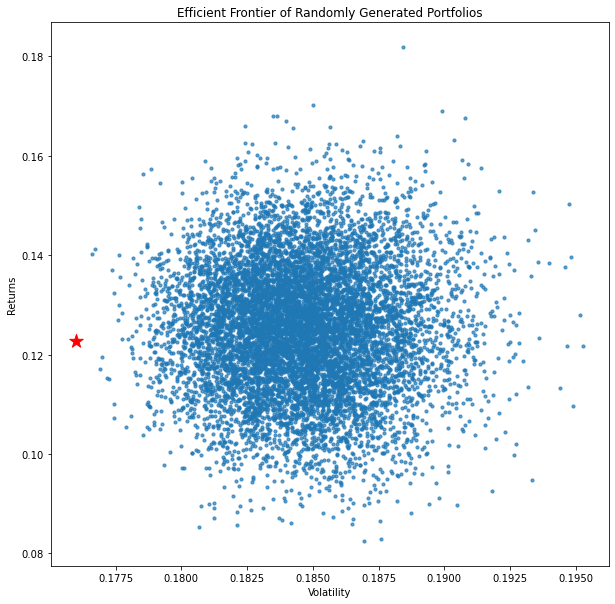

In [15]:
# Plot Efficient Frontier Graph

plt.subplots(figsize=[10, 10])

plt.scatter(
    x=random_portfolios.Volatility, y=random_portfolios.Returns, s=10, alpha=0.7
)

plt.scatter(
    safest_portfolio.Volatility, safest_portfolio.Returns, color="r", marker="*", s=200
)

plt.title("Efficient Frontier of Randomly Generated Portfolios")
plt.xlabel("Volatility")
plt.ylabel("Returns")

plt.show()

In [16]:
# Replace date with Nov. 26, 2021 (format: 'YYYY-MM-DD')

date = "2021-11-24"

In [17]:
# Produce final list of chosen tickers and weights

initial_capital = 100000

current_day = datetime.strptime(date, "%Y-%m-%d")

next_day = current_day + timedelta(days=1)

final_portfolio_columns = ["Ticker", "Price", "Shares", "Value", "Weight"]

FinalPortfolio = pd.DataFrame(columns=final_portfolio_columns)

safest_portfolio_data = safest_portfolio[2:]

safest_portfolio_data = safest_portfolio_data.sort_index()

safest_portfolio_tickers = list(safest_portfolio_data.index)

safest_portfolio_weights = list(safest_portfolio_data.values)

prices = yf.download(safest_portfolio_tickers, start=current_day, end=next_day)

[*********************100%***********************]  20 of 20 completed


In [18]:
current_prices = prices["Adj Close"].loc[date]

FinalPortfolio['Ticker'] = safest_portfolio_tickers

FinalPortfolio['Price'] = current_prices.values

FinalPortfolio['Weight'] = safest_portfolio_weights

FinalPortfolio['Value'] = initial_capital * FinalPortfolio.Weight

FinalPortfolio['Shares'] = FinalPortfolio.Value / FinalPortfolio.Price

FinalPortfolio.index = list(range(1, 21))

FinalPortfolio

,Ticker,Price,Shares,Value,Weight
1,ABT,125.070000,44.223889,5531.081766,0.055311
2,ACN,362.369995,20.056715,7267.951706,0.072680
3,BMY,56.810001,132.825276,7545.804094,0.075458
4,CL,77.760002,44.174917,3435.041665,0.034350
5,CMCSA,51.880001,80.588976,4180.956143,0.041810
6,COST,549.729980,8.242231,4531.001668,0.045310
7,CSCO,55.540001,96.027262,5333.354209,0.053334
8,GOOG,2934.350098,2.174674,6381.253987,0.063813
9,KO,55.430000,19.717059,1092.916583,0.010929
10,LMT,343.579987,11.133424,3825.221612,0.038252


In [19]:
# Sanity Check

total_portfolio_value = FinalPortfolio.Value.sum().round(2)

if total_portfolio_value == initial_capital:
    print(f"The portfolio's total value is ${initial_capital}")

total_weight = FinalPortfolio.Weight.sum().round(2)

if total_weight == 1:
    print("The portfolio's weights add up to 100%.")
    


The portfolio's total value is $100000
The portfolio's weights add up to 100%.


In [20]:
# Export FinalPortfolio Data to CSV

Stocks = FinalPortfolio[['Ticker', 'Shares']]

Stocks.to_csv("Stocks_Group_3.csv", encoding='utf-8')

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Derek, Yuqian, Jeff

### Sources

Image Link: https://www.cryptimi.com/guides/is-diversification-the-right-strategy-for-your-cryptocurrency-portfolio

Equations: Professor Thompson's notes


Definition of MPT & EF: https://www.investopedia.com/terms/e/efficientfrontier.asp https://www.investopedia.com/terms/m/modernportfoliotheory.asp
